<a href="https://colab.research.google.com/github/yutayuta7890/ichiyasaGitSample/blob/master/boidmodel_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

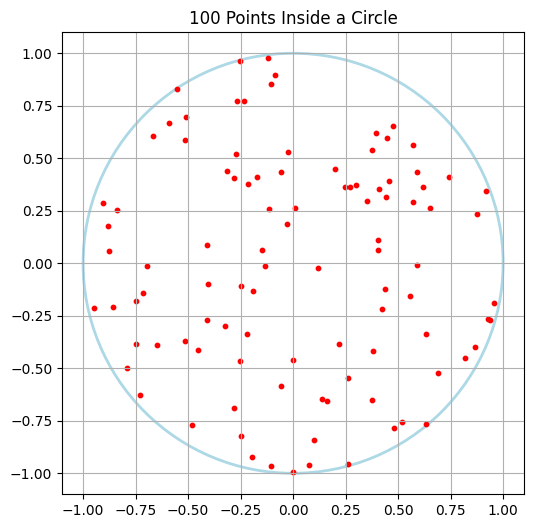

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 点の数
num_points = 100
radius = 1  # 円の半径（原点中心）

# ランダムな角度と距離を生成（極座標）
angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.sqrt(np.random.uniform(0, 1, num_points)) * radius

# 極座標 → デカルト座標
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# 描画
fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), radius, color='lightblue', fill=False, linewidth=2)
ax.add_artist(circle)
ax.scatter(x, y, color='red', s=10)

# 描画設定
ax.set_xlim(-1.1 * radius, 1.1 * radius)
ax.set_ylim(-1.1 * radius, 1.1 * radius)
ax.set_aspect('equal')
ax.set_title("100 Points Inside a Circle")
plt.grid(True)
plt.show()


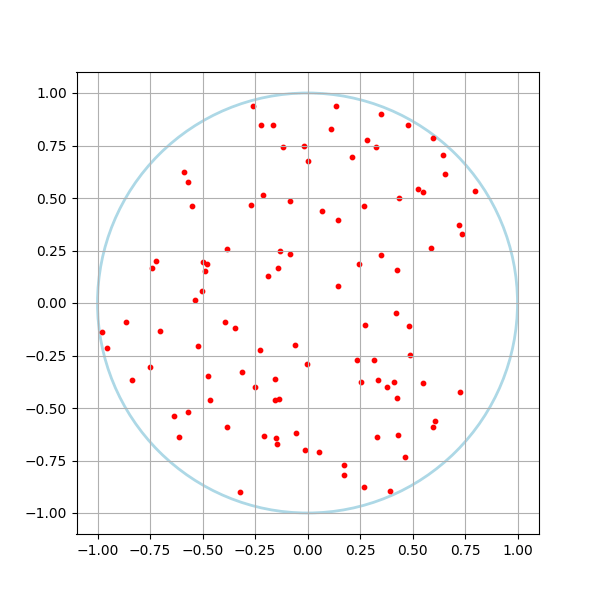

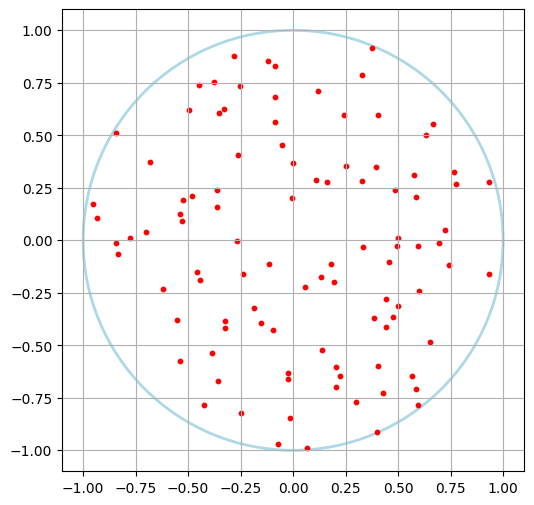

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 点の数と円の半径
num_points = 100
radius = 1.0

# 初期位置（円内に均等に配置）
angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.sqrt(np.random.uniform(0, 1, num_points)) * radius
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# 各点の速度ベクトル（ランダムな方向に等速）
speed = 0.02
vel_angles = np.random.uniform(0, 2 * np.pi, num_points)
vx = speed * np.cos(vel_angles)
vy = speed * np.sin(vel_angles)

# 描画の準備
fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), radius, color='lightblue', fill=False, linewidth=2)
ax.add_artist(circle)
scat = ax.scatter(x, y, color='red', s=10)
ax.set_xlim(-1.1 * radius, 1.1 * radius)
ax.set_ylim(-1.1 * radius, 1.1 * radius)
ax.set_aspect('equal')
plt.grid(True)

def update(frame):
    global x, y, vx, vy
    x += vx
    y += vy
    for i in range(num_points):
        dist = np.sqrt(x[i]**2 + y[i]**2)
        if dist >= radius:
            normal = np.array([x[i], y[i]]) / dist
            velocity = np.array([vx[i], vy[i]])
            reflected = velocity - 2 * np.dot(velocity, normal) * normal
            vx[i], vy[i] = reflected
            overlap = dist - radius
            x[i] -= 2 * overlap * normal[0]
            y[i] -= 2 * overlap * normal[1]
    scat.set_offsets(np.c_[x, y])
    return scat,

# アニメーション生成
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# GIFに保存
ani.save("moving_points.gif", writer=PillowWriter(fps=20))

# Colab上で表示
from IPython.display import Image
Image(open("moving_points.gif", "rb").read())


群知能ルール	説明
整列 (Alignment)	近くの点の速度の平均に合わせる
結合 (Cohesion)	近くの点の位置の中心に向かって移動
分離 (Separation)	近すぎる点から離れるように移動
境界処理	円の中に留まるよう反射

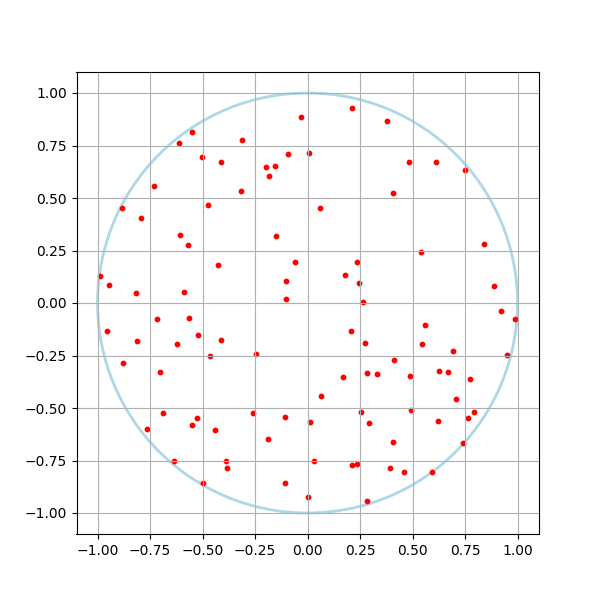

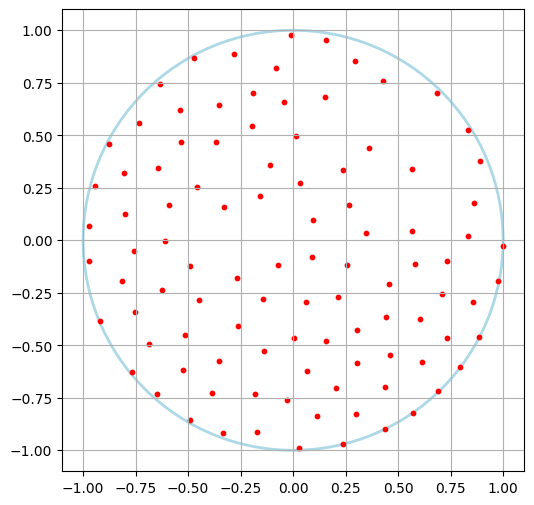

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

# パラメータ
num_points = 100
radius = 1.0
dt = 0.05
neighbor_radius = 0.15  # 群知能の範囲
alignment_weight = 0.05
cohesion_weight = 0.01
separation_weight = 0.1
max_speed = 0.03

# 初期位置（円内ランダム）
angles = np.random.uniform(0, 2 * np.pi, num_points)
radii = np.sqrt(np.random.uniform(0, 1, num_points)) * radius
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# 初期速度（ランダム）
vel_angles = np.random.uniform(0, 2 * np.pi, num_points)
vx = 0.02 * np.cos(vel_angles)
vy = 0.02 * np.sin(vel_angles)

# 描画
fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), radius, color='lightblue', fill=False, linewidth=2)
ax.add_artist(circle)
scat = ax.scatter(x, y, color='red', s=10)
ax.set_xlim(-1.1 * radius, 1.1 * radius)
ax.set_ylim(-1.1 * radius, 1.1 * radius)
ax.set_aspect('equal')
plt.grid(True)

def limit_speed(vx, vy, max_speed):
    speed = np.sqrt(vx**2 + vy**2)
    factor = np.ones_like(speed)
    factor[speed > max_speed] = max_speed / speed[speed > max_speed]
    return vx * factor, vy * factor

def update(frame):
    global x, y, vx, vy

    new_vx = np.copy(vx)
    new_vy = np.copy(vy)

    for i in range(num_points):
        neighbors = []
        for j in range(num_points):
            if i != j:
                dist = np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2)
                if dist < neighbor_radius:
                    neighbors.append(j)

        if neighbors:
            # 1. 整列
            avg_vx = np.mean(vx[neighbors])
            avg_vy = np.mean(vy[neighbors])
            new_vx[i] += alignment_weight * (avg_vx - vx[i])
            new_vy[i] += alignment_weight * (avg_vy - vy[i])

            # 2. 結合
            avg_x = np.mean(x[neighbors])
            avg_y = np.mean(y[neighbors])
            new_vx[i] += cohesion_weight * (avg_x - x[i])
            new_vy[i] += cohesion_weight * (avg_y - y[i])

            # 3. 分離
            diff_x = x[i] - x[neighbors]
            diff_y = y[i] - y[neighbors]
            distances = np.sqrt(diff_x**2 + diff_y**2) + 1e-4
            repulsion_x = np.sum(diff_x / distances)
            repulsion_y = np.sum(diff_y / distances)
            new_vx[i] += separation_weight * repulsion_x
            new_vy[i] += separation_weight * repulsion_y

    # 速度制限
    vx, vy = limit_speed(new_vx, new_vy, max_speed)

    # 位置更新
    x += vx * dt
    y += vy * dt

    # 円の壁に衝突したら反射
    for i in range(num_points):
        dist = np.sqrt(x[i]**2 + y[i]**2)
        if dist >= radius:
            normal = np.array([x[i], y[i]]) / dist
            velocity = np.array([vx[i], vy[i]])
            reflected = velocity - 2 * np.dot(velocity, normal) * normal
            vx[i], vy[i] = reflected
            overlap = dist - radius
            x[i] -= 2 * overlap * normal[0]
            y[i] -= 2 * overlap * normal[1]

    scat.set_offsets(np.c_[x, y])
    return scat,

# アニメーション生成とGIF保存
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
ani.save("swarm_motion.gif", writer=PillowWriter(fps=20))
Image(open("swarm_motion.gif", "rb").read())
